In [1]:
import pandas as pd

train_dataset = pd.read_excel(r'C:/Users/kqb18171/OneDrive - University of Strathclyde/Crystal shape prediction chapter/Crystal_Shape_Classification.xlsx', sheet_name='2-class_train_2butanol')
test_dataset = pd.read_excel(r'C:/Users/kqb18171/OneDrive - University of Strathclyde/Crystal shape prediction chapter/Crystal_Shape_Classification.xlsx', sheet_name='2-class_test_2butanol')

# Training data

In [2]:
# Use numpy to convert to arrays
import numpy as np
# outcomes are the values we want to predict
train_outcomes = np.array(train_dataset['CrysShape'])
# Remove the outcomes from the parameters (data needed for making the prediction)
# axis 1 refers to the columns
train_features = train_dataset.drop(['Solvent name', 'SMILE', 'Conc_mg-mL', 'CrysShape'], axis = 1)
# Saving feature names for later use
train_features_list = list(train_features.columns)
# Convert to numpy array
train_features_list = np.array(train_features_list)

# Test data

In [3]:
# Use numpy to convert to arrays
import numpy as np
# outcomes are the values we want to predict
test_outcomes = np.array(test_dataset['CrysShape'])
# Remove the outcomes from the parameters (data needed for making the prediction)
# axis 1 refers to the columns
test_features = test_dataset.drop(['Solvent name', 'SMILE', 'Conc_mg-mL', 'CrysShape'], axis = 1)
# Saving feature names for later use
test_features_list = list(test_features.columns)
# Convert to numpy array
test_features_list = np.array(test_features_list)

# Model accuracy

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x_train = train_features
y_train = train_outcomes
x_test = test_features
y_test = test_outcomes
         
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
    
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)   

Accuracy:  0.6666666666666666


# Important score

In [5]:
#sort important scores of each parameters
#use only this code, no need to run the previous two sets of code
imp_score = pd.Series(clf.feature_importances_,index=train_features_list).sort_values(ascending=False)

In [6]:
#top 20 parameters with the largest values of important scores
top20_imp_score = imp_score[0:20]
print(top20_imp_score)

SS              0.195478
rings           0.031941
BCUT_SMR_1      0.023770
BCUT_PEOE_2     0.023012
opr_brigid      0.019606
GCUT_PEOE_1     0.019317
logS            0.016543
b_max1len       0.016210
GCUT_PEOE_2     0.015834
h_log_pbo       0.015543
a_aro           0.012583
BCUT_PEOE_1     0.012511
GCUT_SMR_1      0.012342
BCUT_SLOGP_1    0.012114
logP(o/w)       0.011924
GCUT_SLOGP_1    0.011684
GCUT_SLOGP_3    0.011145
PEOE_VSA-5      0.010989
GCUT_PEOE_3     0.010088
PEOE_PC+        0.010005
dtype: float64


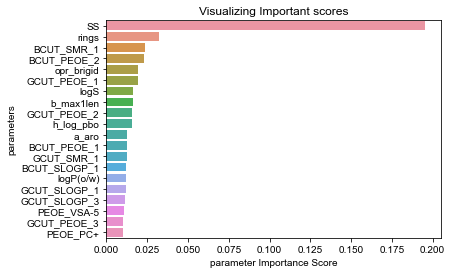

In [7]:
#plot important scores
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=top20_imp_score, y=top20_imp_score.index)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('parameter Importance Score')
plt.ylabel('parameters')
plt.title('Visualizing Important scores')
plt.show()

In [8]:
# Add column 'Prediction' to the dataframe
test_dataset['Prediction'] = y_pred

predicted_shape = test_dataset[['Solvent name', 'Sol_25c', 'SS','CrysShape', 'Prediction']]
predicted_shape

,Solvent name,Sol_25c,SS,CrysShape,Prediction
0,2-Butanol,5.96,1.510067,Polyhedral,Polyhedral
1,2-Butanol,5.96,1.677852,Needle,Needle
2,2-Butanol,5.96,1.641329,Polyhedral,Needle
3,2-Butanol,5.96,1.834181,Polyhedral,Needle
4,2-Butanol,5.96,1.937428,Needle,Needle
5,2-Butanol,5.96,2.029562,Needle,Needle


# Feature selection

## Top-20

In [9]:
#train data
train_features_top20 = train_dataset[top20_imp_score.index]
# Saving feature names for later use
train_features_top20_list = list(train_features_top20.columns)
# Convert to numpy array
train_features_top20_list = np.array(train_features_top20_list)

#test data
test_features_top20 = test_dataset[top20_imp_score.index]
# Saving feature names for later use
test_features_top20_list = list(test_features_top20.columns)
# Convert to numpy array
test_features_top20_list = np.array(test_features_top20_list)

# Model accuracy
x_train = train_features_top20
y_train = train_outcomes
x_test = test_features_top20
y_test = test_outcomes
         
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
    
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)   

Accuracy:  0.5


In [10]:
#plot important scores

imp_score = pd.Series(clf.feature_importances_,index=train_features_top20_list).sort_values(ascending=False)
print(imp_score)

SS              0.184231
PEOE_VSA-5      0.085260
PEOE_PC+        0.065341
opr_brigid      0.057598
logS            0.053693
rings           0.050092
GCUT_PEOE_1     0.049592
BCUT_PEOE_1     0.047488
GCUT_PEOE_3     0.046530
BCUT_SMR_1      0.046096
BCUT_PEOE_2     0.043918
GCUT_SLOGP_3    0.043225
BCUT_SLOGP_1    0.041822
logP(o/w)       0.037919
GCUT_PEOE_2     0.036602
h_log_pbo       0.033685
GCUT_SMR_1      0.031198
GCUT_SLOGP_1    0.019296
b_max1len       0.014504
a_aro           0.011911
dtype: float64


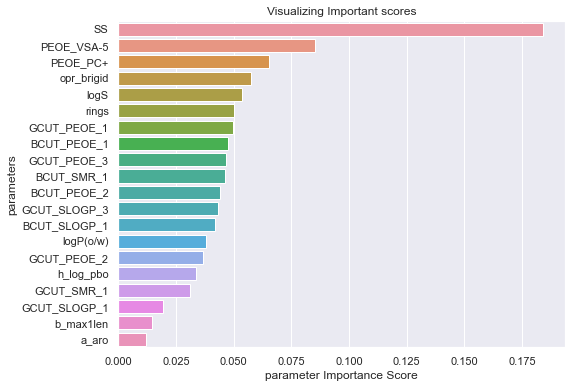

In [11]:
sns.barplot(x=imp_score, y=imp_score.index)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('parameter Importance Score')
plt.ylabel('parameters')
plt.title('Visualizing Important scores')
plt.show()

In [12]:
# Add column 'Prediction' to the dataframe
test_dataset['Prediction'] = y_pred

predicted_shape = test_dataset[['Solvent name', 'Sol_25c', 'SS','CrysShape', 'Prediction']]
predicted_shape

,Solvent name,Sol_25c,SS,CrysShape,Prediction
0,2-Butanol,5.96,1.510067,Polyhedral,Needle
1,2-Butanol,5.96,1.677852,Needle,Needle
2,2-Butanol,5.96,1.641329,Polyhedral,Needle
3,2-Butanol,5.96,1.834181,Polyhedral,Needle
4,2-Butanol,5.96,1.937428,Needle,Needle
5,2-Butanol,5.96,2.029562,Needle,Needle


## Atom counts and bond counts + Pharmacophore features

In [13]:
#train data
train_features_structure = train_dataset[['a_aro', 'a_count', 'a_heavy', 'a_nH', 'a_nC', 'a_nN', 'a_nO', 'a_nS', 'a_nCl', 'a_nBr',
                          'a_nI', 'b_ar', 'b_count', 'b_double', 'b_heavy', 'b_rotN', 'b_single', 'b_triple', 'chiral',
                          'opr_brigid', 'rings', 'a_acc', 'a_don', 'a_acid', 'a_base', 'a_hyd', 'SS']]

# Saving feature names for later use
train_features_structure_list = list(train_features_structure.columns)
# Convert to numpy array
train_features_structure_list = np.array(train_features_structure_list)

#test data
test_features_structure = test_dataset[['a_aro', 'a_count', 'a_heavy', 'a_nH', 'a_nC', 'a_nN', 'a_nO', 'a_nS', 'a_nCl', 'a_nBr',
                          'a_nI', 'b_ar', 'b_count', 'b_double', 'b_heavy', 'b_rotN', 'b_single', 'b_triple', 'chiral',
                          'opr_brigid', 'rings', 'a_acc', 'a_don', 'a_acid', 'a_base', 'a_hyd', 'SS']]

# Saving feature names for later use
test_features_structure_list = list(test_features_structure.columns)
# Convert to numpy array
test_features_structure_list = np.array(test_features_structure_list)

# Model accuracy
x_train = train_features_structure
y_train = train_outcomes
x_test = test_features_structure
y_test = test_outcomes
         
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
    
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)   

Accuracy:  0.6666666666666666


In [14]:
#plot important scores

imp_score = pd.Series(clf.feature_importances_,index=train_features_structure_list).sort_values(ascending=False)
print(imp_score)

SS            0.194404
rings         0.075244
a_count       0.069564
b_single      0.068503
opr_brigid    0.068361
b_heavy       0.051162
b_count       0.050492
a_nC          0.045512
a_nO          0.045333
a_nBr         0.043622
a_nH          0.041987
a_aro         0.038847
a_hyd         0.038415
b_ar          0.030764
a_heavy       0.029102
b_rotN        0.028886
a_nN          0.018671
a_don         0.016159
a_nCl         0.015642
b_double      0.014877
a_acc         0.010446
a_nS          0.002401
b_triple      0.001226
a_nI          0.000382
chiral        0.000000
a_acid        0.000000
a_base        0.000000
dtype: float64


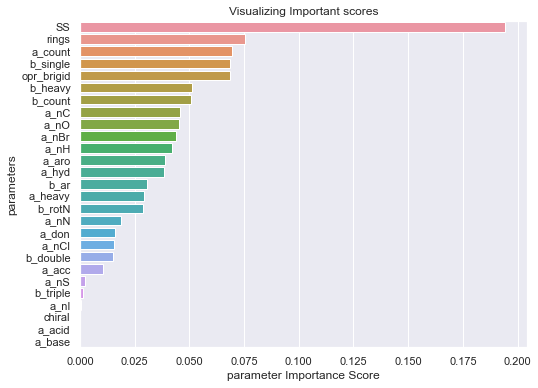

In [15]:
sns.barplot(x=imp_score, y=imp_score.index)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('parameter Importance Score')
plt.ylabel('parameters')
plt.title('Visualizing Important scores')
plt.show()

In [16]:
# Add column 'Prediction' to the dataframe
test_dataset['Prediction'] = y_pred

In [17]:
predicted_shape = test_dataset[['Solvent name', 'Sol_25c', 'SS','CrysShape', 'Prediction']]
predicted_shape

,Solvent name,Sol_25c,SS,CrysShape,Prediction
0,2-Butanol,5.96,1.510067,Polyhedral,Polyhedral
1,2-Butanol,5.96,1.677852,Needle,Needle
2,2-Butanol,5.96,1.641329,Polyhedral,Needle
3,2-Butanol,5.96,1.834181,Polyhedral,Needle
4,2-Butanol,5.96,1.937428,Needle,Needle
5,2-Butanol,5.96,2.029562,Needle,Needle


## Physical properties

In [18]:
# train data
train_features_prop = train_dataset[['apol', 'bpol', 'density', 'mr', 'SMR', 'Weight', 'logP(o/w)', 'logS', 'reactive',
                          'SlogP', 'TPSA', 'vdw_vol', 'vdw_area', 'SS']]
# Saving feature names for later use
train_features_prop_list = list(train_features_prop.columns)
# Convert to numpy array
train_features_prop_list = np.array(train_features_prop_list)

# test data
test_features_prop = test_dataset[['apol', 'bpol', 'density', 'mr', 'SMR', 'Weight', 'logP(o/w)', 'logS', 'reactive',
                          'SlogP', 'TPSA', 'vdw_vol', 'vdw_area', 'SS']]
# Saving feature names for later use
test_features_prop_list = list(test_features_prop.columns)
# Convert to numpy array
test_features_prop_list = np.array(test_features_prop_list)

# Model accuracy
x_train = train_features_prop
y_train = train_outcomes
x_test = test_features_prop
y_test = test_outcomes
         
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
    
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)   

Accuracy:  0.6666666666666666


In [19]:
#plot important scores

imp_score = pd.Series(clf.feature_importances_,index=train_features_prop_list).sort_values(ascending=False)
print(imp_score)

SS           0.189788
logS         0.109241
mr           0.094100
vdw_area     0.079962
bpol         0.078040
vdw_vol      0.076823
logP(o/w)    0.074486
SMR          0.066677
apol         0.064111
Weight       0.043101
density      0.042912
SlogP        0.038416
TPSA         0.037320
reactive     0.005023
dtype: float64


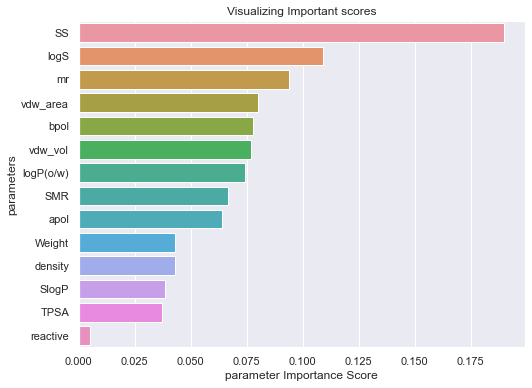

In [20]:
sns.barplot(x=imp_score, y=imp_score.index)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('parameter Importance Score')
plt.ylabel('parameters')
plt.title('Visualizing Important scores')
plt.show()

In [21]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[3 0]
 [2 1]]


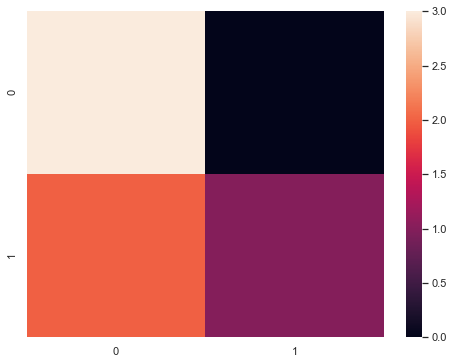

In [22]:
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

In [23]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Needle       0.60      1.00      0.75         3
  Polyhedral       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



In [24]:
# Add column 'Prediction' to the dataframe
test_dataset['Prediction'] = y_pred

In [25]:
predicted_shape = test_dataset[['Solvent name', 'Sol_25c', 'SS','CrysShape', 'Prediction']]
predicted_shape

,Solvent name,Sol_25c,SS,CrysShape,Prediction
0,2-Butanol,5.96,1.510067,Polyhedral,Polyhedral
1,2-Butanol,5.96,1.677852,Needle,Needle
2,2-Butanol,5.96,1.641329,Polyhedral,Needle
3,2-Butanol,5.96,1.834181,Polyhedral,Needle
4,2-Butanol,5.96,1.937428,Needle,Needle
5,2-Butanol,5.96,2.029562,Needle,Needle
